In [1]:
!git clone https://github.com/opmalhi/Text-Classification.git

Cloning into 'Text-Classification'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 26.21 MiB | 10.53 MiB/s, done.


In [2]:
# Load dataset and explore it
import pandas as pd

data = pd.read_json('/content/Text-Classification/News_Category_Dataset_v3.json', lines=True)
print(data.head())

                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog y

In [3]:
# Preprocess dataset
import numpy as np

# Combine title and short_description
data['text'] = data['headline'] + " " + data['short_description']

# Filter relevant categories
relevant_categories = ['WORLD NEWS', 'ENVIRONMENT', 'PARENTING']
data = data[data['category'].isin(relevant_categories)]

# Encode categories into numerical labels
category_mapping = {
    'WORLD NEWS': 0,     # Human Rights
    'ENVIRONMENT': 1,    # Sustainability
    'PARENTING': 2       # Child Advocacy
}
data['label'] = data['category'].apply(lambda x: category_mapping[x])

print(data.head())

                                                 link  \
3   https://www.huffpost.com/entry/funniest-parent...   
7   https://www.huffpost.com/entry/puerto-rico-wat...   
9   https://www.huffpost.com/entry/biden-un-russia...   
10  https://www.huffpost.com/entry/bc-soc-wcup-cap...   
11  https://www.huffpost.com/entry/man-sets-fire-p...   

                                             headline    category  \
3   The Funniest Tweets From Parents This Week (Se...   PARENTING   
7   Puerto Ricans Desperate For Water After Hurric...  WORLD NEWS   
9   Biden At UN To Call Russian War An Affront To ...  WORLD NEWS   
10  World Cup Captains Want To Wear Rainbow Armban...  WORLD NEWS   
11  Man Sets Himself On Fire In Apparent Protest O...  WORLD NEWS   

                                    short_description             authors  \
3   "Accidentally put grown-up toothpaste on my to...    Caroline Bologna   
7   More than half a million people remained witho...     DÁNICA COTO, AP   
9   White H

<ipython-input-3-f445f1c1963d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['category'].apply(lambda x: category_mapping[x])


In [4]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Convert data into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [6]:
# Train Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [7]:
# Evaluate classifier
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test_vect)

print(classification_report(y_test, y_pred, target_names=category_mapping.keys()))

              precision    recall  f1-score   support

  WORLD NEWS       0.92      0.89      0.91       674
 ENVIRONMENT       0.95      0.34      0.50       298
   PARENTING       0.89      1.00      0.94      1735

    accuracy                           0.90      2707
   macro avg       0.92      0.74      0.78      2707
weighted avg       0.90      0.90      0.88      2707



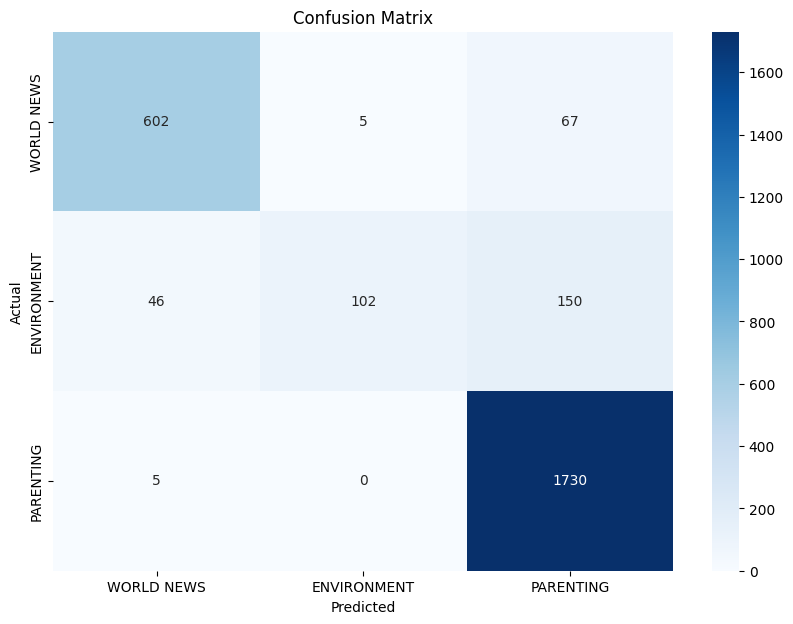

In [8]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_mapping.keys(), yticklabels=category_mapping.keys())

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()